## Feature engeneering
- eature Engineering is the process of creating, modifying, or selecting features (the input variables) to help a machine learning model perform better.

## Feature Extraction
- taking useful inromation from RAW DATA

In [43]:
import pandas as pd
import numpy as np

In [44]:
data = {
    'Studen ID':[1,2,3,4,5],
    'Height_cm':[160,170,165,180,175],
    'Weight_kg':[55,68,60,85,78],
    'Hours_Studied':[4,6,5,7,3],
    'Attendance':[80,90,85,95,70],
    'Assignment_Score':[75,85,78,92,65],
    'Final_Grade':['B','A','B','A','C']
    }

In [45]:
df= pd.DataFrame(data)

In [46]:
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade
0,1,160,55,4,80,75,B
1,2,170,68,6,90,85,A
2,3,165,60,5,85,78,B
3,4,180,85,7,95,92,A
4,5,175,78,3,70,65,C


In [47]:
df['Height_m'] = (df['Height_cm']/100)

In [48]:
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,Height_m
0,1,160,55,4,80,75,B,1.60
1,2,170,68,6,90,85,A,1.70
2,3,165,60,5,85,78,B,1.65
3,4,180,85,7,95,92,A,1.80
4,5,175,78,3,70,65,C,1.75


### Creating new features

#### BMI = mass/(height)^2

In [49]:
BMI = (df['Weight_kg']/df['Height_m']**2)
df['BMI']= BMI
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,Height_m,BMI
0,1,160,55,4,80,75,B,1.60,21.484375
1,2,170,68,6,90,85,A,1.70,23.529412
2,3,165,60,5,85,78,B,1.65,22.038567
3,4,180,85,7,95,92,A,1.80,26.234568
4,5,175,78,3,70,65,C,1.75,25.469388


#### study_efficiency =Hours_studied * Attendence

In [50]:
Study_efficiency = df['Hours_Studied']*df['Attendance']
df['Study_efficiency']= Study_efficiency
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,Height_m,BMI,Study_efficiency
0,1,160,55,4,80,75,B,1.60,21.484375,320
1,2,170,68,6,90,85,A,1.70,23.529412,540
2,3,165,60,5,85,78,B,1.65,22.038567,425
3,4,180,85,7,95,92,A,1.80,26.234568,665
4,5,175,78,3,70,65,C,1.75,25.469388,210


#### Performance_ratio = Assigment_Score / Hours_of_Study

In [51]:
Performance_ratio = df['Assignment_Score']/df['Hours_Studied']
df['Performance_Ratio']= Performance_ratio
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,Height_m,BMI,Study_efficiency,Performance_Ratio
0,1,160,55,4,80,75,B,1.60,21.484375,320,18.750000
1,2,170,68,6,90,85,A,1.70,23.529412,540,14.166667
2,3,165,60,5,85,78,B,1.65,22.038567,425,15.600000
3,4,180,85,7,95,92,A,1.80,26.234568,665,13.142857
4,5,175,78,3,70,65,C,1.75,25.469388,210,21.666667


#### Original Columns
- Height_cm
- Weight_kg	
- Hours_Studied
- Attendance
- Assignment_Score
- Final_Grade

#### Derived Columns
- Height_m	
- BMI
- Study_efficiency
- Performance_Ratio

#### Drop column (Height_m)

In [52]:
df = df.drop("Height_m", axis=1)
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,BMI,Study_efficiency,Performance_Ratio
0,1,160,55,4,80,75,B,21.484375,320,18.750000
1,2,170,68,6,90,85,A,23.529412,540,14.166667
2,3,165,60,5,85,78,B,22.038567,425,15.600000
3,4,180,85,7,95,92,A,26.234568,665,13.142857
4,5,175,78,3,70,65,C,25.469388,210,21.666667


#### Display correlation matrix

In [53]:
df.corr(numeric_only=True)

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,BMI,Study_efficiency,Performance_Ratio
Studen ID,1.000000,0.800000,0.803477,-0.100000,-0.246598,-0.201074,0.813028,-0.084025,0.216951
Height_cm,0.800000,1.000000,0.994781,0.400000,0.246598,0.324811,0.984848,0.420124,-0.232202
Weight_kg,0.803477,0.994781,1.000000,0.344347,0.190798,0.278140,0.996271,0.366945,-0.163650
Hours_Studied,-0.100000,0.400000,0.344347,1.000000,0.986394,0.989901,0.272304,0.999452,-0.975741
Attendance,-0.246598,0.246598,0.190798,0.986394,1.000000,0.991689,0.116272,0.982946,-0.987503
Assignment_Score,-0.201074,0.324811,0.278140,0.989901,0.991689,1.000000,0.208250,0.990453,-0.963363
BMI,0.813028,0.984848,0.996271,0.272304,0.116272,0.208250,1.000000,0.295790,-0.085930
Study_efficiency,-0.084025,0.420124,0.366945,0.999452,0.982946,0.990453,0.295790,1.000000,-0.968271
Performance_Ratio,0.216951,-0.232202,-0.163650,-0.975741,-0.987503,-0.963363,-0.085930,-0.968271,1.000000


#### Strong Correlations
- Height_cm with => Weight_kg, BMI
- Weight_kg with => Height_cm, BMI
- Hours_Studied with => Attendence, Assignment_Score, Study_efficiency, Performance_Ratio(Negative)
- Attendence with => Hours_studied, Assigment_Score, Study_efficiency, Performance_Ratio(Negative)
- BMI with => Weight_kg, Height_cm
- Study_effficiency => Hours_Studied, Attendence, Assignment_Score, Performance_ ratio(Negative)
- Performance_Ratio => Hours_Studied(Negative), Attendence(Negative), Assignment_Score(Negative), Study_efficiency(Negative)

#### Why feature engineering importace before model bulding?
- Convert raw data into machine-readable form   ->  Enables model training
- Improve data quality   ->  Boosts accuracy
- Remove noise and redundancy   ->  Prevents overfitting
- Reduce complexity   ->  Faster training
- Add meaningful insights   ->  Easier to explain

#### Feature Encoding

In [54]:
df['Final_Grade_Code']= df['Final_Grade'].map({'A':3,'B':2,'C':1})
df.head()

,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,BMI,Study_efficiency,Performance_Ratio,Final_Grade_Code
0,1,160,55,4,80,75,B,21.484375,320,18.750000,2
1,2,170,68,6,90,85,A,23.529412,540,14.166667,3
2,3,165,60,5,85,78,B,22.038567,425,15.600000,2
3,4,180,85,7,95,92,A,26.234568,665,13.142857,3
4,5,175,78,3,70,65,C,25.469388,210,21.666667,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['Study_efficiency']])
df['Study_efficiency_Scale'] = scaled_values

df.head()


,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,Final_Grade,BMI,Study_efficiency,Performance_Ratio,Final_Grade_Code,Study_efficiency_Scale
0,1,160,55,4,80,75,B,21.484375,320,18.750000,2,0.241758
1,2,170,68,6,90,85,A,23.529412,540,14.166667,3,0.725275
2,3,165,60,5,85,78,B,22.038567,425,15.600000,2,0.472527
3,4,180,85,7,95,92,A,26.234568,665,13.142857,3,1.000000
4,5,175,78,3,70,65,C,25.469388,210,21.666667,1,0.000000


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df_numeric_features = df.select_dtypes(include=["int64","float64"])
df_numeric_features.head()


,Studen ID,Height_cm,Weight_kg,Hours_Studied,Attendance,Assignment_Score,BMI,Study_efficiency,Performance_Ratio,Final_Grade_Code,Study_efficiency_Scale
0,1,160,55,4,80,75,21.484375,320,18.750000,2,0.241758
1,2,170,68,6,90,85,23.529412,540,14.166667,3,0.725275
2,3,165,60,5,85,78,22.038567,425,15.600000,2,0.472527
3,4,180,85,7,95,92,26.234568,665,13.142857,3,1.000000
4,5,175,78,3,70,65,25.469388,210,21.666667,1,0.000000


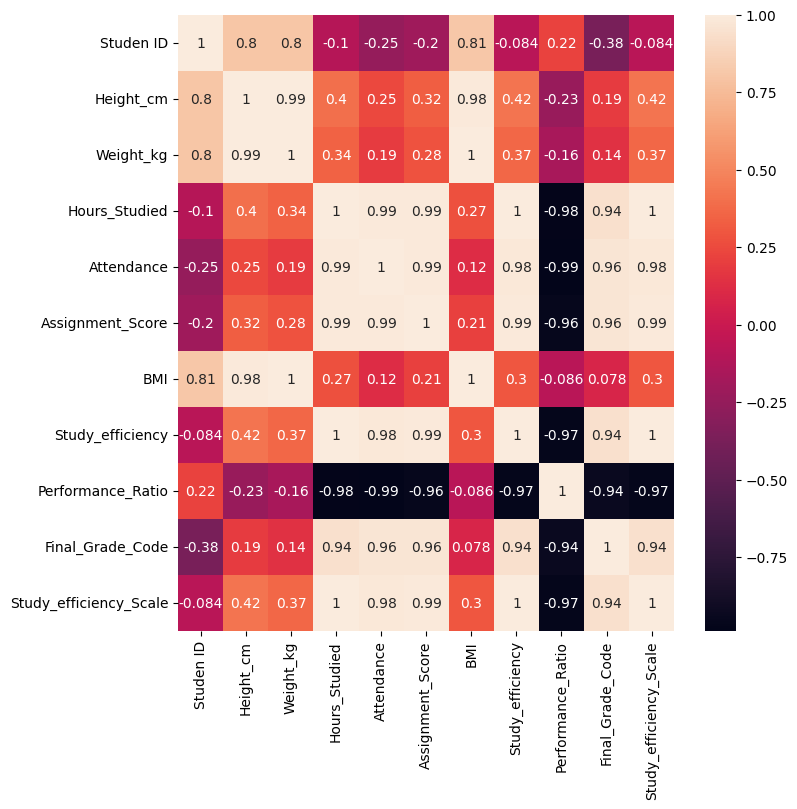

In [61]:
plt.figure(figsize = (8,8))
sns.heatmap(df_numeric_features.corr(), annot = True)
plt.show()

#### Outlier ditection

In [65]:
student_list = df.loc[df['BMI']>30,'Studen ID'].tolist()
print(student_list)

[]


#### Which engineered feature best represent student performance and why?
- study_efficiency is the strongest engineerd festure to represent student performance due to its high positive correlation with Final_Grade_Code

#### Why should we drop irrelevent or redundant features?
- Improve Model Performance	Reduces noise and increases accuracy	
- Reduce Overfitting	Model focuses on meaningful patterns	
- Speed Up Training	Less computation, Simplify Model	
- Reduce Multicollinearity	Stabilizes model coefficients

#### If you were to bulit a prediction model, which 3 features whould you select and why? 